# Lidando com dados de muitas dimensões
---

In [109]:
import pandas as pd

In [110]:
url_dados = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

In [111]:
dados = pd.read_csv(url_dados)
dados.shape

(569, 35)

In [112]:
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


## Separação dos dados de treino e teste
---

In [113]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = dados.drop(columns=['id', 'diagnostico'])
valores_exames = valores_exames.drop(columns=['exame_33'])
diagnostico = dados.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, train_size=0.3)

## Tratando os valores nulos
---

In [114]:
valores_exames.isnull().sum()

exame_1     0
exame_2     0
exame_3     0
exame_4     0
exame_5     0
exame_6     0
exame_7     0
exame_8     0
exame_9     0
exame_10    0
exame_11    0
exame_12    0
exame_13    0
exame_14    0
exame_15    0
exame_16    0
exame_17    0
exame_18    0
exame_19    0
exame_20    0
exame_21    0
exame_22    0
exame_23    0
exame_24    0
exame_25    0
exame_26    0
exame_27    0
exame_28    0
exame_29    0
exame_30    0
exame_31    0
exame_32    0
dtype: int64

## Criando o modelo Random Forest
---

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
"{:.2%}".format(classificador.score(teste_x, teste_y))

'93.48%'

## Classificar Dummy
---

In [117]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
"{:.2%}".format(dummy.score(teste_x, teste_y))

'63.91%'

## Análise Exploratória e Padrozinando os dados
--- 


In [118]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    plt.figure(figsize=(10, 10))
    sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)

    plt.xticks(rotation=90)

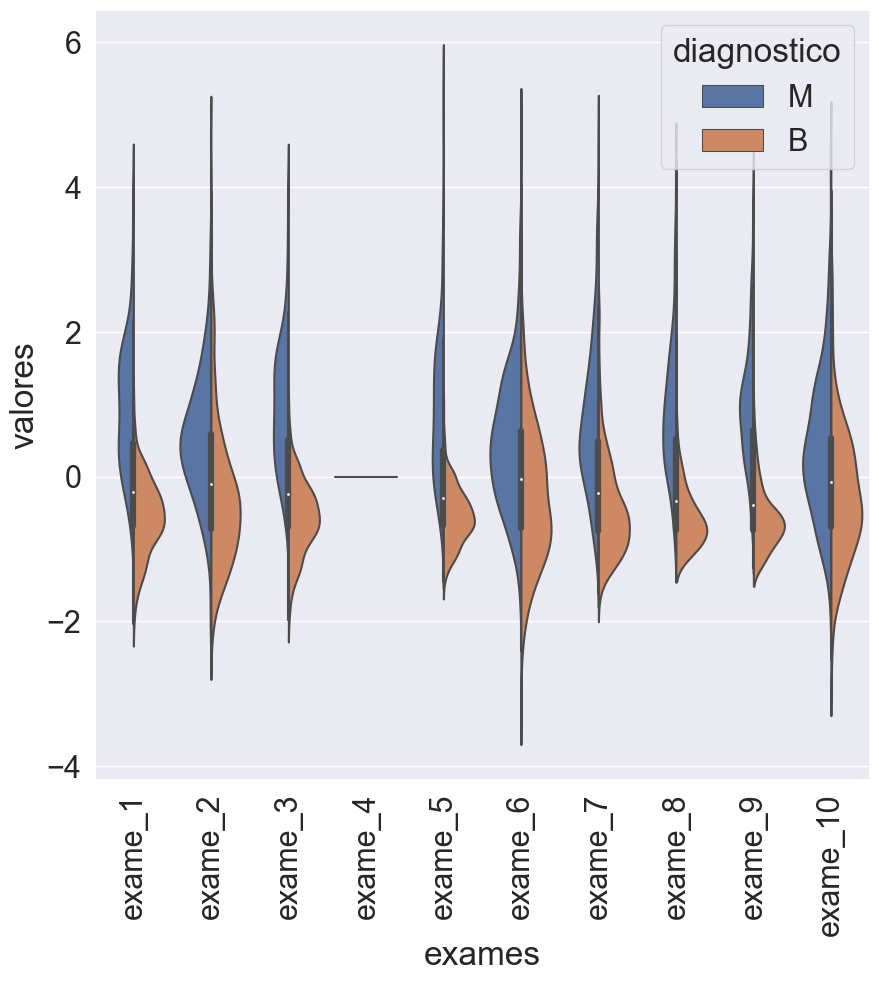

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_padronizados = padronizador.transform(valores_exames)
valores_exames_padronizados = pd.DataFrame(valores_exames_padronizados, columns=valores_exames.keys())

grafico_violino(valores_exames_padronizados, 0, 10)

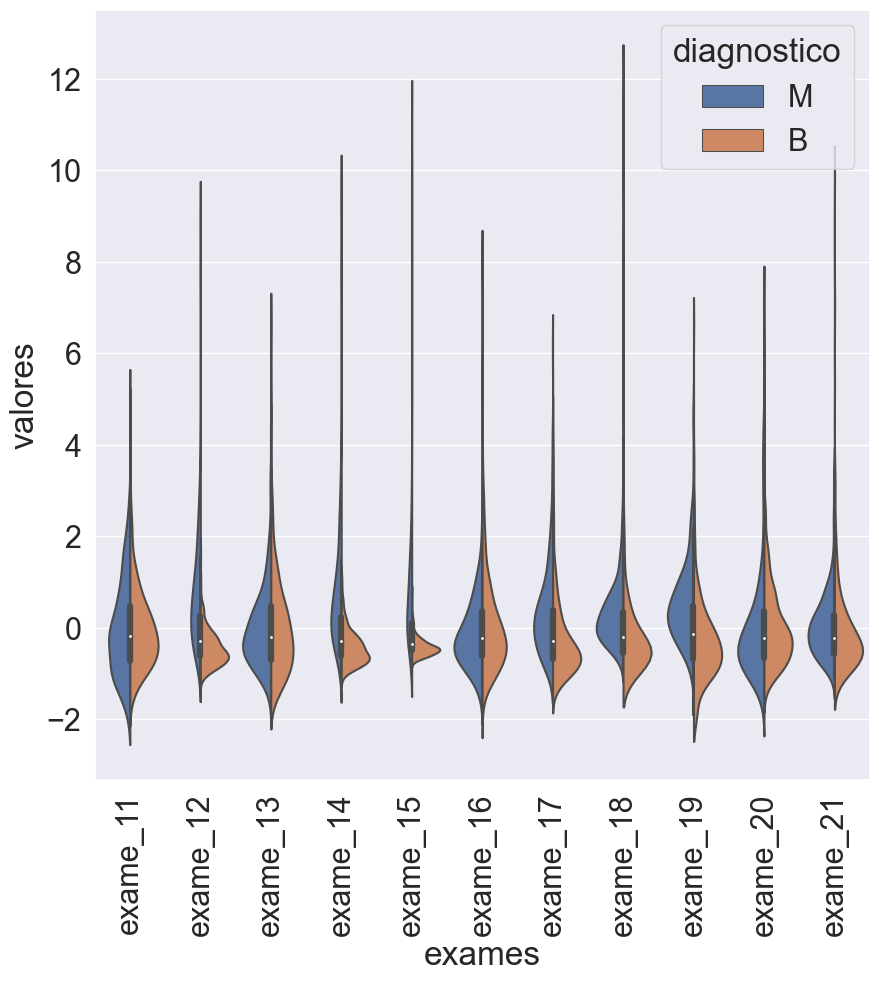

In [120]:
grafico_violino(valores_exames_padronizados, 10, 21)

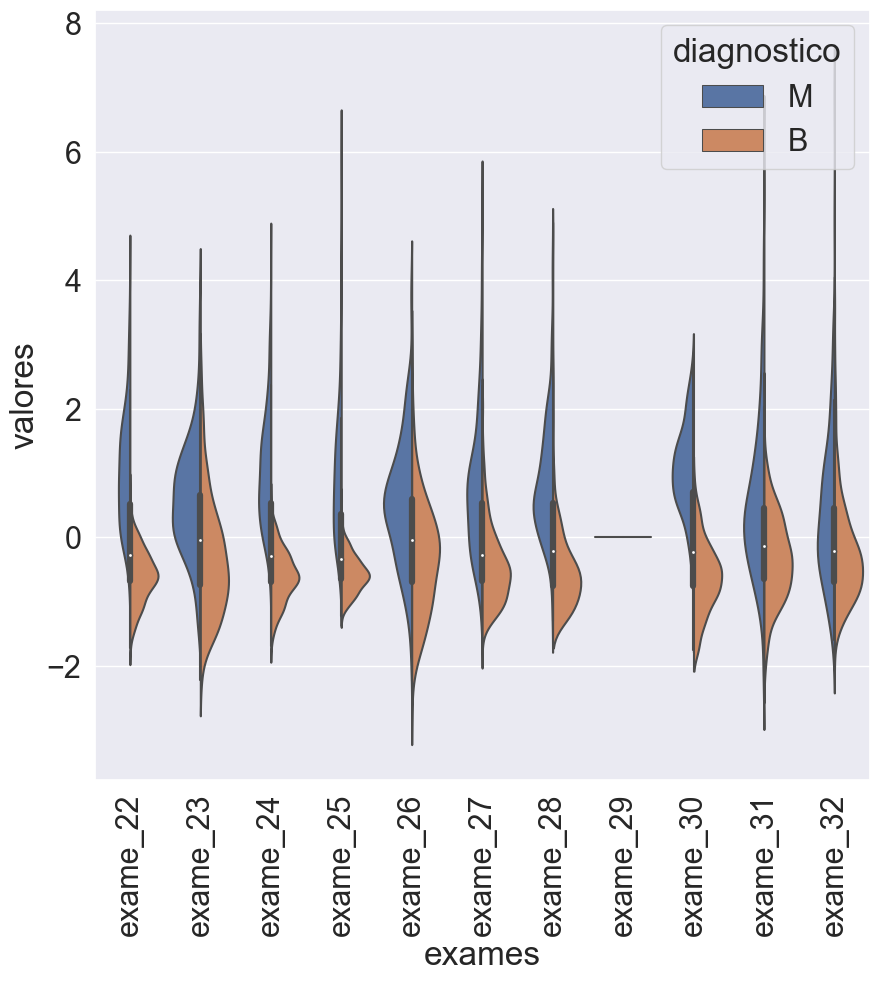

In [121]:
grafico_violino(valores_exames_padronizados, 21, 32)

In [122]:
valores_exames_tratado = valores_exames_padronizados.drop(columns=['exame_29', 'exame_4'])

In [123]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, train_size=0.3)
    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    print("{:.2%}".format(classificador.score(teste_x, teste_y)))

In [124]:
classificar(valores_exames_tratado)

93.98%


## Matrix de correlação
---

<Axes: >

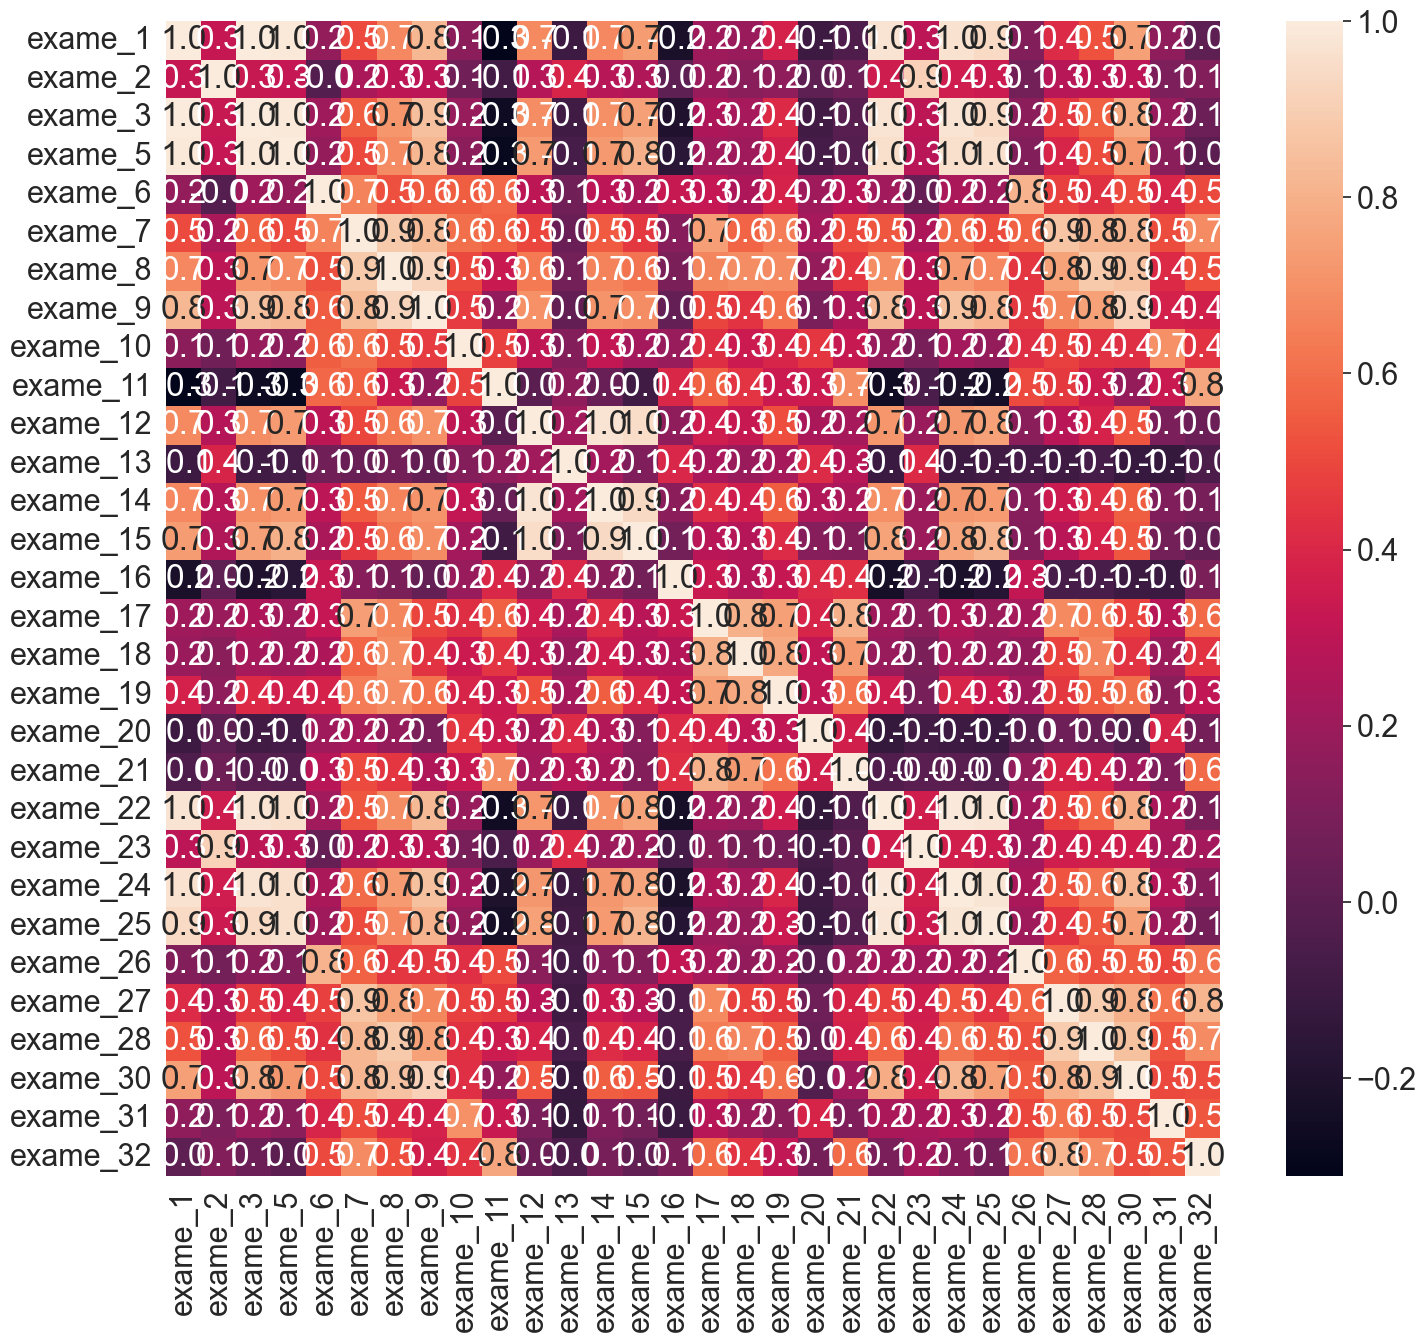

In [125]:
matrix_correlacao = valores_exames_tratado.corr()

plt.figure(figsize=(17, 15))
sns.heatmap(matrix_correlacao, annot=True, fmt=".1f")

In [126]:
matrix_correlacao_v1 = matrix_correlacao[matrix_correlacao > 0.99]
matrix_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
matrix_correlacao_2 = matrix_correlacao_v1.sum()
matrix_correlacao_2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [128]:
variaveis_correlacionadas = matrix_correlacao_2[matrix_correlacao_2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [129]:
valores_exames_tratato = valores_exames_tratado.drop(columns=variaveis_correlacionadas.keys())
valores_exames_tratato.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [130]:
classificar(valores_exames_tratato)

93.98%


In [131]:
valores_exames_tratato = valores_exames_tratado.drop(columns=['exame_3', 'exame_24'])
valores_exames_tratato.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [132]:
classificar(valores_exames_tratato)

93.23%


## Automatizando a seleção das melhores k-features
---

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=5)

In [134]:
valores_exames_ = valores_exames.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_, diagnostico, train_size=0.3)

In [135]:
selector.fit(treino_x, treino_y)
treino_kbest = selector.transform(treino_x)
teste_kbest = selector.transform(teste_x)

In [136]:
treino_kbest.shape

(170, 5)

In [137]:
teste_kbest.shape

(399, 5)

In [138]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("{:.2%}".format(classificador.score(teste_kbest, teste_y)))

91.98%


## Matriz de confusão
---

In [139]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[230,  17],
       [ 15, 137]], dtype=int64)

[Text(0.5, 62.249999999999986, 'predicao'), Text(77.25, 0.5, 'real')]

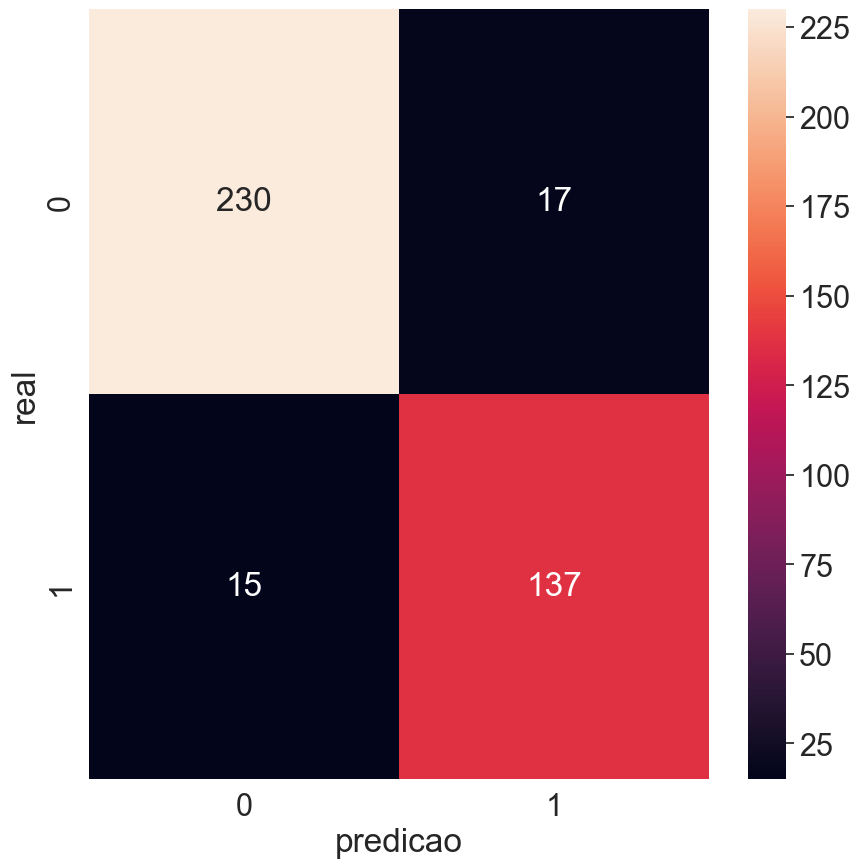

In [140]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel='predicao', ylabel='real')

## Fazendo a seleção de features pelo modelo RFE (recursive feature elimination)
---

93.23%


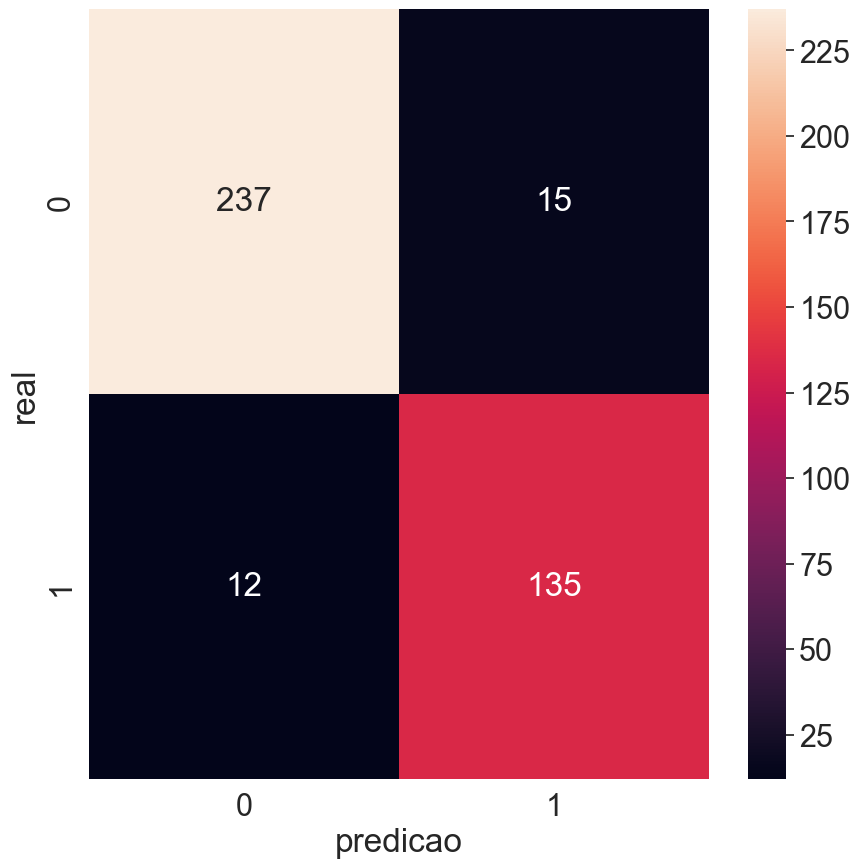

In [141]:
from sklearn.feature_selection import RFE

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_, diagnostico, train_size=0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionar_rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)
selecionar_rfe.fit(treino_x, treino_y)


treino_rfe = selecionar_rfe.transform(treino_x)
teste_rfe = selecionar_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)


matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(10, 10))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel='predicao', ylabel='real')

print("{:.2%}".format(classificador.score(teste_rfe, teste_y)))

## Fazendo a seleção de features pelo modelo RFECV (recursive feature elimination cross validation)
---

93.98%


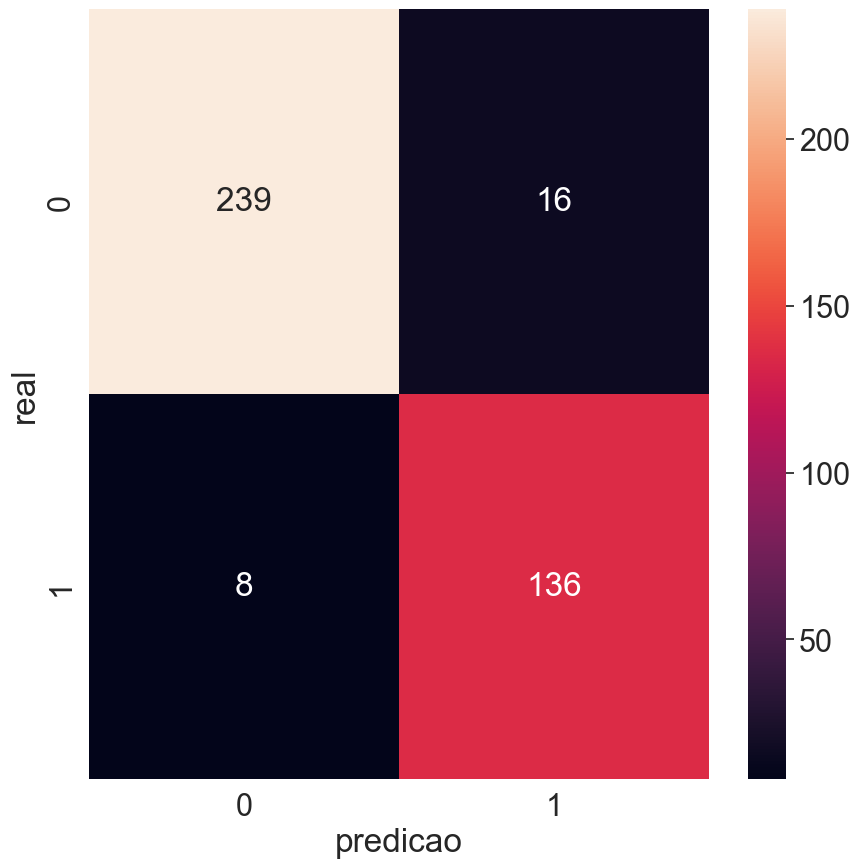

In [142]:
from sklearn.feature_selection import RFECV

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_, diagnostico, train_size=0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionar_rfecv = RFECV(estimator=classificador, cv=5, scoring='accuracy')
selecionar_rfecv.fit(treino_x, treino_y)


treino_rfecv = selecionar_rfecv.transform(treino_x)
teste_rfecv = selecionar_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)


matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(10, 10))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel='predicao', ylabel='real')

print("{:.2%}".format(classificador.score(teste_rfecv, teste_y)))

In [143]:
quantidade_de_colunas_selecionandas_pelo_rfecv = selecionar_rfecv.n_features_

In [144]:
colunas_escolhidas_pelo_rfecv = selecionar_rfecv.support_
treino_x.columns[colunas_escolhidas_pelo_rfecv]

Index(['exame_1', 'exame_5', 'exame_8', 'exame_9', 'exame_15', 'exame_16',
       'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_30'],
      dtype='object')

In [145]:
selecionar_rfecv.cv_results_['mean_test_score']

array([0.9       , 0.92941176, 0.95882353, 0.95294118, 0.95294118,
       0.95882353, 0.97058824, 0.95294118, 0.95294118, 0.96470588,
       0.96470588, 0.96470588, 0.97647059, 0.97647059, 0.97058824,
       0.97647059, 0.97058824, 0.97058824, 0.97058824, 0.96470588,
       0.97058824, 0.96470588, 0.97058824, 0.97647059, 0.96470588,
       0.97647059, 0.96470588, 0.97647059])

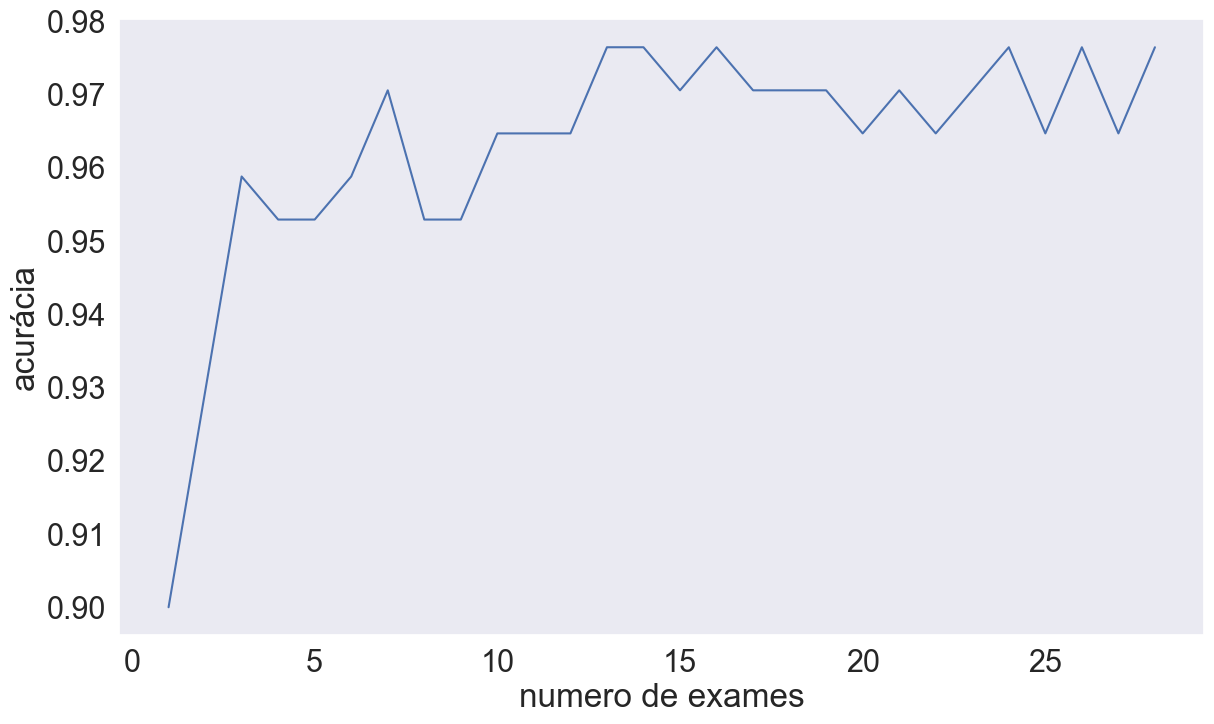

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel('numero de exames')
plt.ylabel('acurácia')
plt.grid()
plt.plot(range(1, len(selecionar_rfecv.cv_results_['mean_test_score']) + 1), selecionar_rfecv.cv_results_['mean_test_score'])

In [147]:
valores_exames_temp = selecionar_rfe.transform(valores_exames_)

In [148]:
valores_exames_temp.shape

(569, 2)

<Axes: >

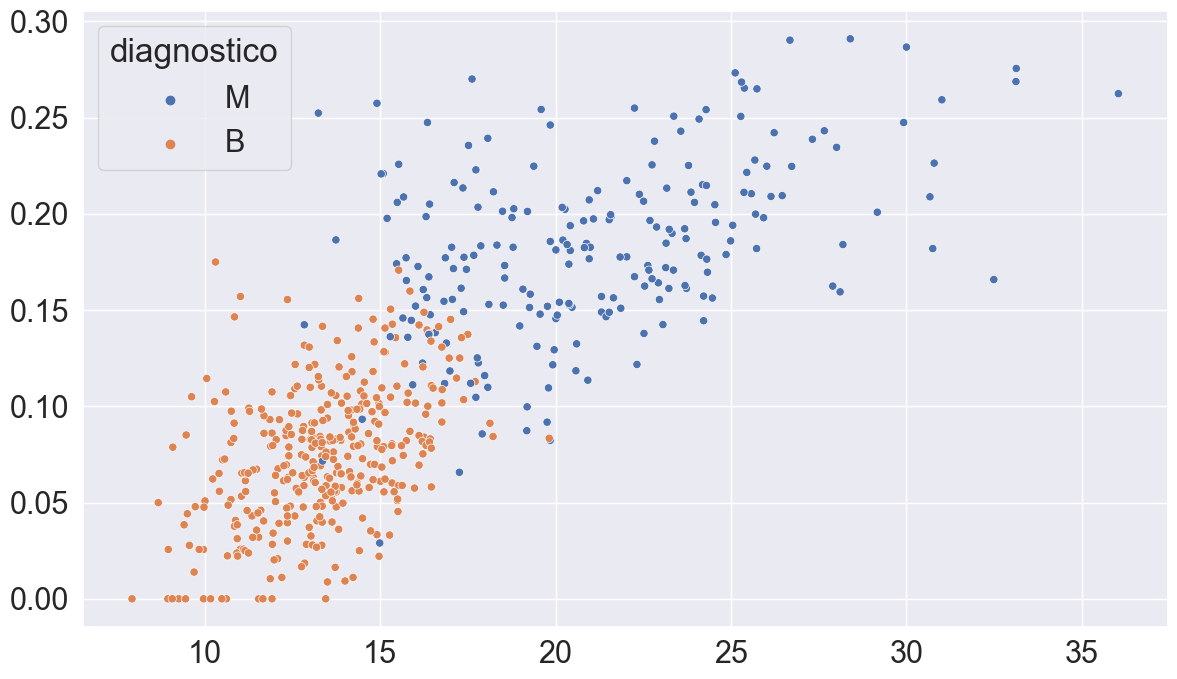

In [149]:
import seaborn as sns


plt.figure(figsize=(14, 8))
sns.scatterplot(x=valores_exames_temp[:,0], y=valores_exames_temp[:,1], hue=diagnostico)

In [150]:
from sklearn.decomposition import PCA

# Utilizando o PCA ele tera um melhor desempenho utilizando uma base de dados ja normalizada

pca = PCA(n_components=2)
valores_ = pca.fit_transform(valores_exames_)

<Axes: >

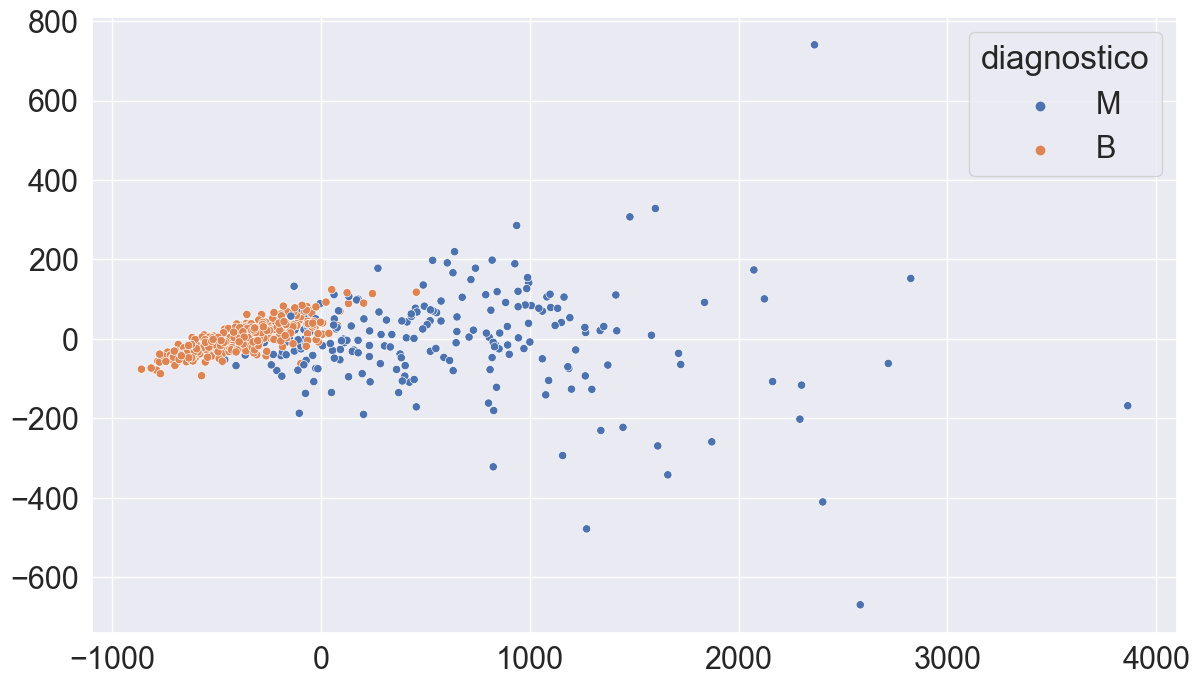

In [151]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=valores_[:,0], y=valores_[:,1], hue=diagnostico)

<Axes: >

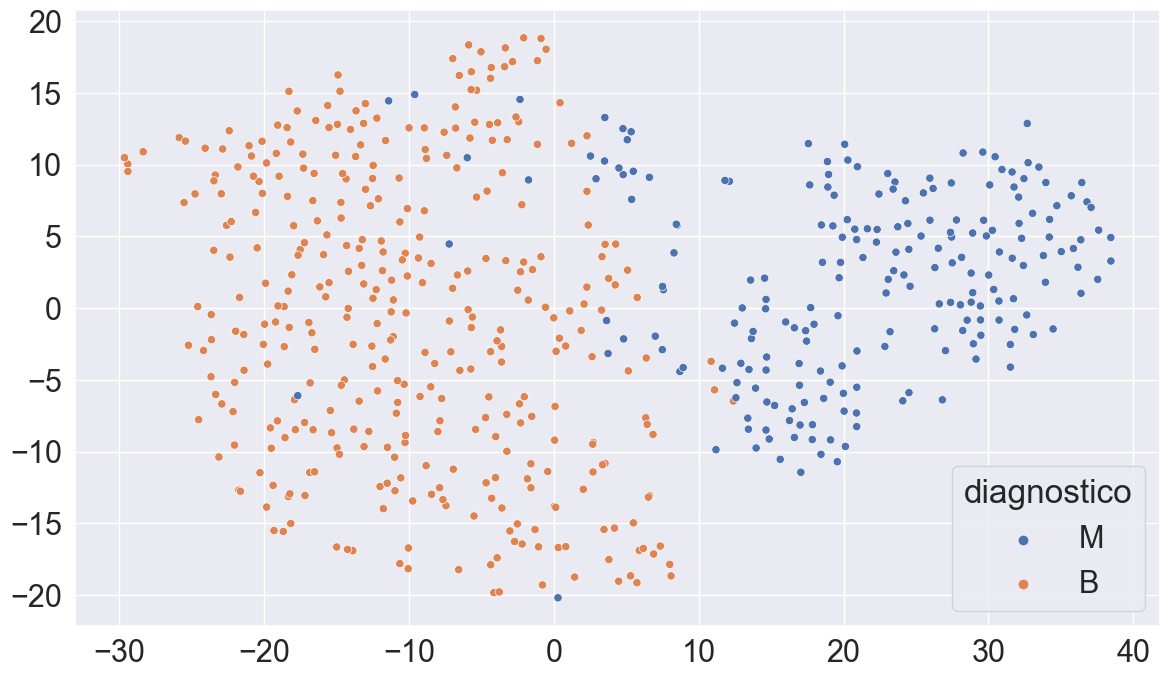

In [152]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2)
valores_ = tsne.fit_transform(valores_exames_padronizados)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=valores_[:,0], y=valores_[:,1], hue=diagnostico)